<a href="https://colab.research.google.com/github/ssawant/TensorFlow-in-Practice/blob/main/C2W3_Convolution_Neural_Network_transfer_learning_dropout_Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [7]:
import os
from tensorflow.keras import Model, layers

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weight_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights= None)

pre_trained_model.load_weights(local_weight_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

# pre_trained_model.summary()
last_layer = pre_trained_model.get_layer('mixed10')
print(f'last layer output shape {last_layer.output_shape}')
last_output = last_layer.output


--2020-12-23 02:21:40--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   122MB/s    in 0.7s    

2020-12-23 02:21:41 (122 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape (None, 3, 3, 2048)


In [9]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation=tf.nn.relu)(x)
# Add dropout rate of 0.2
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation=tf.nn.sigmoid)(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=tf.optimizers.RMSprop(lr=1e-4), loss=tf.losses.binary_crossentropy, metrics=['accuracy'])

In [14]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os, zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')
validation_cat_dir = os.path.join(validation_dir, 'cats') 
validation_dog_dir = os.path.join(validation_dir, 'dogs')

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range =0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size =(150,150))
test_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size =(150,150))

--2020-12-23 02:43:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.128, 142.250.128.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   324MB/s    in 0.2s    

2020-12-23 02:43:32 (324 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit(train_generator, validation_data=test_generator, steps_per_epoch=100,epochs=20,validation_steps=50,verbose=2)

Epoch 1/20
100/100 - 149s - loss: 1.2816 - accuracy: 0.8360 - val_loss: 0.3157 - val_accuracy: 0.9200
Epoch 2/20
100/100 - 144s - loss: 0.4529 - accuracy: 0.8950 - val_loss: 0.2558 - val_accuracy: 0.9350
Epoch 3/20
100/100 - 144s - loss: 0.3843 - accuracy: 0.8935 - val_loss: 0.1519 - val_accuracy: 0.9630
Epoch 4/20
100/100 - 143s - loss: 0.3325 - accuracy: 0.9065 - val_loss: 0.1727 - val_accuracy: 0.9510
Epoch 5/20
100/100 - 144s - loss: 0.3546 - accuracy: 0.9155 - val_loss: 0.2057 - val_accuracy: 0.9400
Epoch 6/20
100/100 - 144s - loss: 0.3120 - accuracy: 0.9190 - val_loss: 0.1226 - val_accuracy: 0.9590
Epoch 7/20
100/100 - 144s - loss: 0.2937 - accuracy: 0.9140 - val_loss: 0.1312 - val_accuracy: 0.9630
Epoch 8/20
100/100 - 144s - loss: 0.3320 - accuracy: 0.9170 - val_loss: 0.1302 - val_accuracy: 0.9570
Epoch 9/20
100/100 - 143s - loss: 0.2741 - accuracy: 0.9255 - val_loss: 0.1301 - val_accuracy: 0.9590
Epoch 10/20
100/100 - 143s - loss: 0.2821 - accuracy: 0.9170 - val_loss: 0.1228 - 

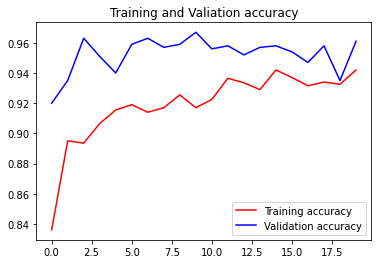

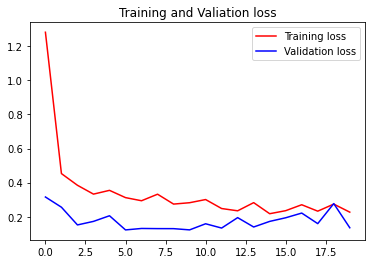

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs,acc, 'r', label='Training accuracy')
plt.plot(epochs,val_acc, 'b', label='Validation accuracy')
plt.title('Training and Valiation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss, 'r', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and Valiation loss')
plt.legend()

plt.show()
